In [1]:
import numpy as np
import pandas as pd

data_dir = "../LlenguaCatalana/Dades/"

Barcelona = pd.read_csv(data_dir + "Barcelona.csv", delimiter=";", header = 17)
Girona = pd.read_csv(data_dir + "ComarquesGironines.csv", delimiter=";", header = 17)
Central = pd.read_csv(data_dir + "ComarquesCentrals.csv", delimiter=";", header = 17)
Pirineu = pd.read_csv(data_dir + "AltPirineu&Aran.csv", delimiter=";", header = 17)
Tarragona = pd.read_csv(data_dir + "CampDeTarragona.csv", delimiter=";", header = 17)
Ponent = pd.read_csv(data_dir + "Ponent.csv", delimiter=";", header = 17)
Ebre = pd.read_csv(data_dir + "TerresDeL'Ebre.csv", delimiter=";", header = 17)
Penedes = pd.read_csv(data_dir + "Penedes201120132018.csv", delimiter=";", header = 11)

#Barcelona
print(Girona)
#Central
#Pirineu
#Tarragona
#Ponent
#Ebre
#Penedes


    Any Entendre'l Parlar-lo Llegir-lo Escriure'l
0  2018       94,9      87,4      88,4       71,5
1  2013       95,4      84,9      85,9       65,8
2  2011      95,07     77,04     80,48      60,66
3  2008       95,1      81,7      80,8       63,4
4  2001      95,55     81,63     80,32      58,42
5  1996      96,70     84,36     79,92      53,77
6  1991      96,44     80,66     76,61      49,32
7  1986      95,11     80,26     70,97      39,75


In [2]:
import pip
pip.main(["install","matplotlib"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: matplotlib in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (3.9.2)

Requirement already satisfied: contourpy>=1.0.1 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (1.3.0)

Requirement already satisfied: cycler>=0.10 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (4.55.0)

Requirement already satisfied: kiwisolver>=1.3.1 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (1.4.7)

Requirement already satisfied: numpy>=1.23 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (2.0.2)

Requirement already satisfied: packaging>=20.0 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (24.2)

Requirement already satisfied: pillow>=8 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (11.0.0)

Requirement already satisfied: pyparsing>=2.3.1 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (3.2.0)

Requirement already satisfied: python-dateutil>=2.7 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (2.9.0.post0)

Requirement already satisfied: importlib-resources>=3.2.0 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from matplotlib) (6.4.5)

Requirement already satisfied: zipp>=3.1.0 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from importlib-resources>=3.2.0->matplotlib) (3.21.0)

Requirement already satisfied: six>=1.5 in /Users/eudaldvilar/VirtualEnviroment/lib/python3.9/site-packages (from python-dateutil>=2.7->matplotlib) (1.16.0)

0

In [3]:
from matplotlib import pyplot as plt

print(Girona.index)

RangeIndex(start=0, stop=8, step=1)


In [4]:
import geopandas as gpd

data_dir = "../LlenguaCatalana/Dades/"
vegueries = gpd.read_file(data_dir + "vegueries.json")

In [5]:
print(vegueries.columns)

Index(['CODIVEGUE', 'NOMVEGUE', 'CAPVEGUE', 'AREAV5000', 'geometry'], dtype='object')


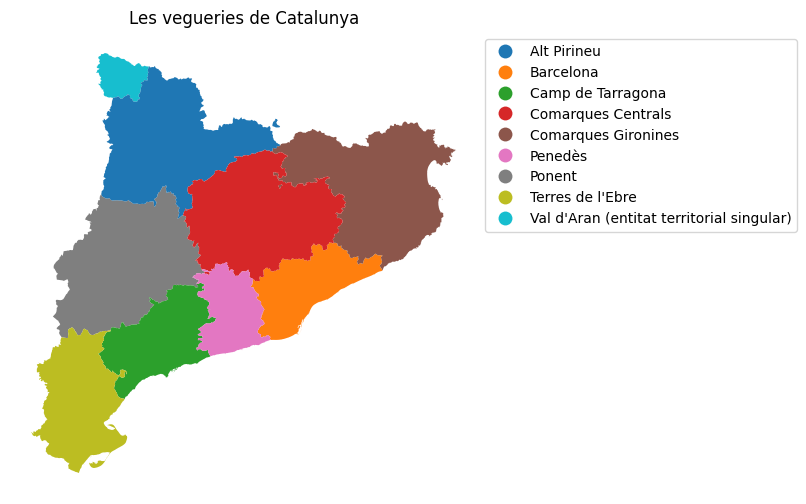

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot the data and move the legend
ax = vegueries.plot(
    column='NOMVEGUE',  # Replace with the column used for coloring
    legend=True,           # Add a legend
    legend_kwds={
        'loc': 'upper left',  # Change legend position
        'bbox_to_anchor': (1, 1),  # Fine-tune position (outside the plot)
    },
    figsize=(10, 6)         # Size of the plot
)

# Customize and display the plot
plt.title("Les vegueries de Catalunya")
ax.axis('off')
plt.show()


In [66]:
import geopandas as gpd

data_dir = "../LlenguaCatalana/Dades/"
vegueriesAntigues = gpd.read_file(data_dir + "quecullons.geojson")


print(vegueriesAntigues.columns)

Index(['id', 'NOMVEGUE', 'geometry'], dtype='object')


ValueError: aspect must be finite and positive 

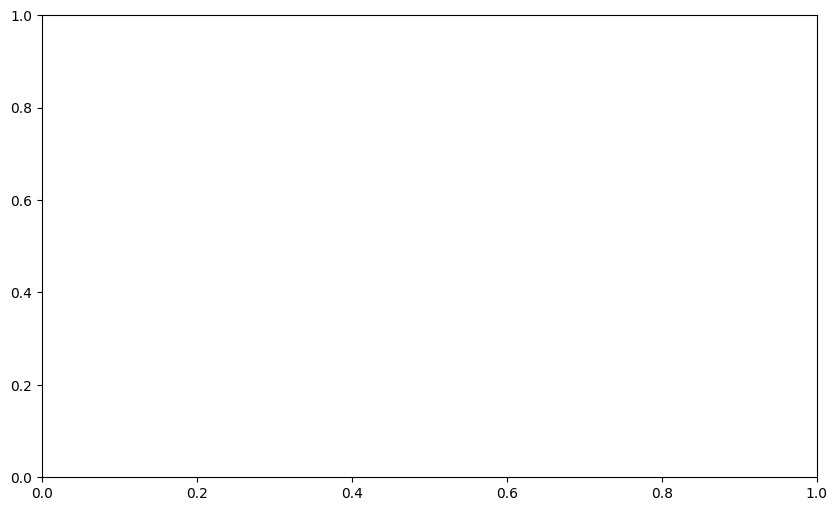

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt

ax1 = vegueriesAntigues.plot(
    column='NOMVEGUE',  # Replace with the column used for coloring
    legend=True,         # Add a legend
    legend_kwds={
        'loc': 'upper left',  # Change legend position
        'bbox_to_anchor': (1, 1),  # Fine-tune position (outside the plot)
    },
    figsize=(10, 6)       # Size of the plot
)

# Set aspect ratio manually to 'auto' or another value
ax1.set_aspect('auto')
plt.title("Les vegueries antigues de Catalunya")
ax1.axis('off')
plt.show()

In [63]:
invalid_geometries = vegueriesAntigues[vegueriesAntigues.is_valid == False]
print(invalid_geometries)


Empty GeoDataFrame
Columns: [id, NOMVEGUE, geometry]
Index: []


In [58]:
vegueriesAntigues = vegueriesAntigues[vegueriesAntigues.is_valid]


In [51]:
# Remove coordinates that are out of bounds (latitude: -90 to 90, longitude: -180 to 180)
vegueriesAntigues = vegueriesAntigues[vegueriesAntigues.geometry.apply(
    lambda geom: np.all(np.logical_and(geom.bounds[0] >= -180, geom.bounds[0] <= 180)) and
                np.all(np.logical_and(geom.bounds[1] >= -90, geom.bounds[1] <= 90))
)]



ValueError: aspect must be finite and positive 

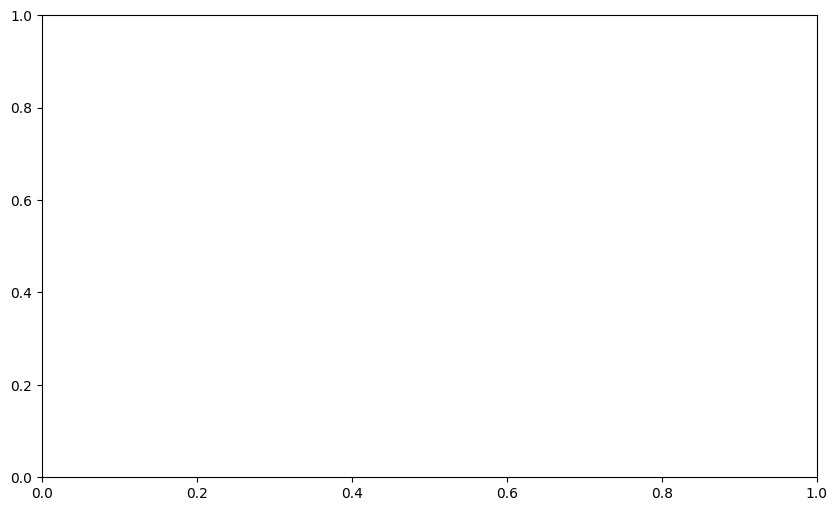

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt

ax1 = vegueriesAntigues.plot(
    column='NOMVEGUE',  # Replace with the column used for coloring
    legend=True,         # Add a legend
    legend_kwds={
        'loc': 'upper left',  # Change legend position
        'bbox_to_anchor': (1, 1),  # Fine-tune position (outside the plot)
    },
    figsize=(10, 6)       # Size of the plot
)

# Set aspect ratio manually to 'auto' or another value
ax1.set_aspect('equal')
plt.title("Les vegueries antigues de Catalunya")
ax1.axis('off')
plt.show()

In [61]:
# Print out the bounds of the first few geometries
print(vegueriesAntigues.geometry.bounds.head())


         minx        miny        maxx        maxy
0   67.652098 -190.296367  272.074582  -10.932123
1  263.921100 -233.331531  463.181705  -68.961732
2  169.914652 -286.889934  347.581533 -109.475775
3  202.634387 -335.088128  391.258807 -208.090504
4   30.209153 -326.863734  201.411336 -156.298037


TypeError: unhashable type: 'numpy.ndarray'

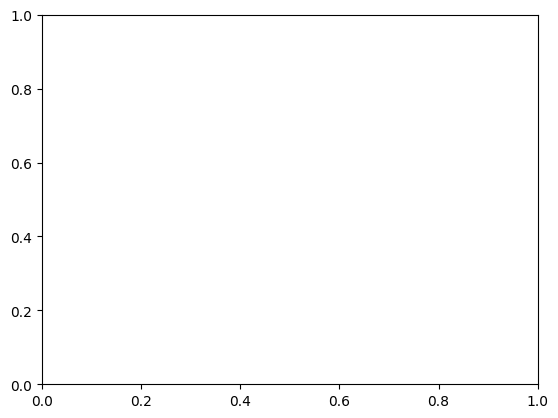